## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [84]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [6]:
print(x_train.shape[0])

60000


In [7]:
print(x_test.shape[0])

10000


### Find dimensions of an image in the dataset

In [10]:
print(x_train[0].shape)

(28, 28)


In [11]:
print(x_train[0].ndim)

2


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [12]:
import numpy as np

In [13]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [15]:
num_classes=len(np.unique(y_train))

In [16]:
# encoding output label
import tensorflow as tf 

In [85]:
y_train_en = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test_en = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

In [18]:
y_train_en[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

### Normalize both the train and test image data from 0-255 to 0-1

In [86]:
# Normalize the data from 0-255 to 0-1 by dividing the inputs by 255. 
x_train=x_train.astype("float32")/255

In [87]:
x_test=x_test.astype("float32")/255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [88]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)) 

In [22]:
x_train.shape

(60000, 28, 28, 1)

In [23]:
from matplotlib import pyplot as plt

### Import the necessary layers from keras to build the model

In [33]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,Activation,Dense,MaxPool2D,Dropout,BatchNormalization
from keras.callbacks import EarlyStopping

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [38]:
#Clear any previous model from memory
tf.keras.backend.clear_session()

#Initialize model
model = Sequential()

#normalize data
model.add(BatchNormalization(input_shape=(28,28,1,)))

#Add Conv Layer
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))

#normalize data
model.add(BatchNormalization())

#Add Conv Layer
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))

#normalize data
model.add(BatchNormalization())

#Add Dense Layers after flattening the data
model.add(Flatten())
model.add(Dense(128, activation='relu'))

#Add Dropout
#model.add(tf.keras.layers.Dropout(0.25))

#Add Output Layer
model.add(Dense(10, activation='softmax'))

In [39]:
#Specify Loass and Optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
early_stopping=EarlyStopping(monitor='val_loss',patience=5,mode='auto')

In [41]:
callbacks=[early_stopping]

In [42]:
model.fit(batch_size=32,epochs=10,x=x_train,y=y_train_en,validation_data=(x_test,y_test_en),callbacks=callbacks)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6077 - accuracy: 0.8169 - val_loss: 0.3316 - val_accuracy: 0.8842
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2580 - accuracy: 0.9051 - val_loss: 0.3667 - val_accuracy: 0.8801
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1979 - accuracy: 0.9266 - val_loss: 0.2813 - val_accuracy: 0.9067
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1536 - accuracy: 0.9430 - val_loss: 0.3783 - val_accuracy: 0.8995
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1176 - accuracy: 0.9573 - val_loss: 0.3230 - val_accuracy: 0.9070
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0888 - accuracy: 0.9676 - val_loss: 0.3611 - val_accuracy: 0.9069
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0725 - accuracy: 0.9750 - val_loss: 0.4256 - val_accuracy:

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [68]:
#Clear any previous model from memory
tf.keras.backend.clear_session()

#Initialize model
model1 = Sequential()

#normalize data
model1.add(BatchNormalization(input_shape=(28,28,1,)))

#Add Conv Layer
model1.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
#model1.add(MaxPool2D(pool_size=(2,2)))
#normalize data
model1.add(BatchNormalization())

#Add Conv Layer
model1.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Dropout(0.25))
#normalize data
model1.add(BatchNormalization())

#Add Dense Layers after flattening the data
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))

#Add Dropout
#model1.add(Dropout(0.25))

#Add Output Layer
model1.add(Dense(10, activation='softmax'))

In [69]:
#Specify Loass and Optimizer
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
model1.fit(batch_size=32,epochs=10,x=x_train,y=y_train_en,validation_data=(x_test,y_test_en),callbacks=callbacks)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4829 - accuracy: 0.8298 - val_loss: 0.2882 - val_accuracy: 0.8933
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2393 - accuracy: 0.9105 - val_loss: 0.2656 - val_accuracy: 0.9070
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1970 - accuracy: 0.9258 - val_loss: 0.2547 - val_accuracy: 0.9110
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1630 - accuracy: 0.9381 - val_loss: 0.2448 - val_accuracy: 0.9185
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1320 - accuracy: 0.9507 - val_loss: 0.2340 - val_accuracy: 0.9227
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1161 - accuracy: 0.9569 - val_loss: 0.2704 - val_accuracy: 0.9208
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1032 - accuracy: 0.9625 - val_loss: 0.2801 - val_accuracy:

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [56]:
from keras.preprocessing.image import ImageDataGenerator

In [71]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [58]:
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

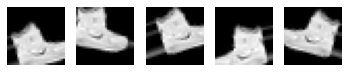

In [59]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [72]:
model1.fit(datagen.flow(x_train, y_train_en, batch_size=32),
          epochs=10,validation_data=(x_test,y_test_en))

Epoch 1/10
  12/1875 [..............................] - ETA: 18s - loss: 0.3962 - accuracy: 0.8438

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


1875/1875 [==============================] - 18s 10ms/step - loss: 0.4027 - accuracy: 0.8514 - val_loss: 0.3582 - val_accuracy: 0.8700
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3980 - accuracy: 0.8522 - val_loss: 0.3470 - val_accuracy: 0.8762
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3907 - accuracy: 0.8563 - val_loss: 0.3359 - val_accuracy: 0.8800
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3868 - accuracy: 0.8561 - val_loss: 0.3689 - val_accuracy: 0.8677
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3815 - accuracy: 0.8592 - val_loss: 0.3473 - val_accuracy: 0.8773
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3797 - accuracy: 0.8597 - val_loss: 0.3601 - val_accuracy: 0.8683
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3701 - accuracy: 0.8629 - val_loss: 0.3661 - val_accura

###  Report the final train and validation accuracy

In [89]:
model1.evaluate(x_test,y_test_en)

313/313 [==============================] - 1s 2ms/step - loss: 0.3635 - accuracy: 0.8635


[0.36348849534988403, 0.8634999990463257]

In [90]:
model.evaluate(x_test,y_test_en)

313/313 [==============================] - 1s 3ms/step - loss: 0.4246 - accuracy: 0.9050


[0.4246141016483307, 0.9049999713897705]

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [94]:
import numpy as np
from keras.datasets import cifar10
from matplotlib import pyplot as plt

### **Load CIFAR10 dataset**

In [106]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [92]:
x_train.shape

(50000, 32, 32, 3)

In [93]:
x_test.shape

(10000, 32, 32, 3)

In [107]:
x_train=x_train.astype("float32")/255

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [113]:
data_gen = ImageDataGenerator(
    #featurewise_center=True,
    #featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,vertical_flip=True)

### **Prepare/fit the generator.**

In [114]:
data_gen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

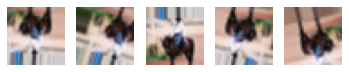

In [115]:
gen = data_gen.flow(x_train[11:12], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()